In [175]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

Dataset:
* Age - paciento amzius
* Sex - paciento lytis
* BP - spaudimas
* Cholesterol - cholesterolio lygis
* Na_to_K - kalis - natris
* Drug - Vaistas kuris padėjo

Source:

https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv
https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees

In [176]:
df = pd.read_csv("./drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


# Pasiruošimas

Kategoriniai i skaitinius

In [177]:
df["Sex"] = df["Sex"].map({"M": 0, "F": 1})
df["BP"] = df["BP"].map({"HIGH": 0, "LOW": 1, "NORMAL": 2})
df["Cholesterol"] = df["Cholesterol"].map({"HIGH": 0, "NORMAL": 1})

Suskaidau duomenų poaibius į įvestis (X) ir išvestis (y) .

**Pasirenku "Drug" kaip prognozuojamą atributą. Jo kardinalumas 5**

In [178]:
X = df.drop("Drug", axis=1)
y = df.Drug

Suskaidau į apmokymo (train) bei testavimo (test) poaibius 

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Medis (1) - Medžio gylis 4


## Medžio sudarymas

In [180]:
model = DecisionTreeClassifier(max_depth = 4);
model.fit(X,y);

## Modelio testavimas

Pateike testavimo duomenis gauname spejimus

In [181]:
y_predict = model.predict(X_test)

Sulyginame gautus rezultatus (y_predict) su tikrais (y_test) gauname tikslumą/paklaidą.

In [182]:
accuracy_score(y_test, y_predict)

1.0

In [183]:
model.score(X_test, y_test)

1.0

**MAE** : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

**MSE** : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [184]:
score = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
score.head()

,Actual,Predicted
95,drugX,drugX
15,drugY,drugY
30,drugX,drugX
158,drugC,drugC
128,drugY,drugY


## Medžio atvaizdavimas

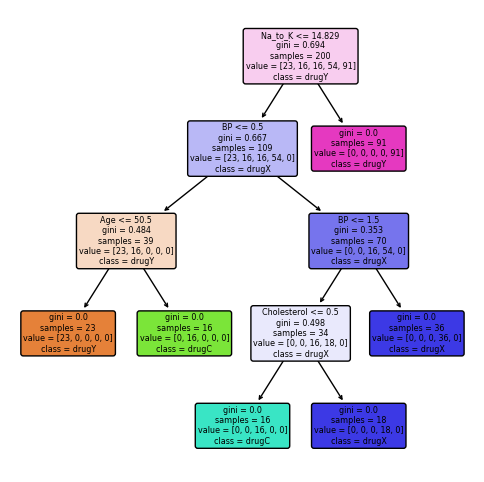

In [185]:
plt.figure(figsize = (6, 6))
plt.title('Decision Tree Classification')
plot_tree(model, max_depth = 5, feature_names = X_train.columns, class_names = y_train, filled = True, rounded = True);

## Confusion Matrix

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

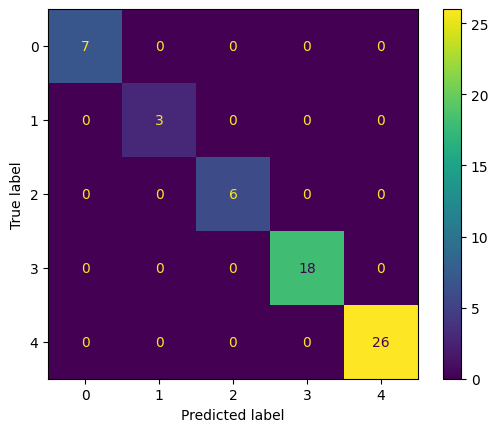

In [186]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict)).plot();

# Medis (2) - Medžio gylis 3


Acuracy score:  0.9


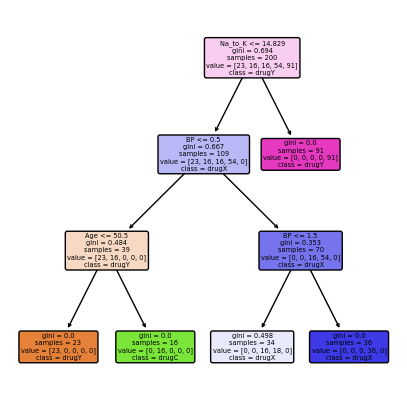

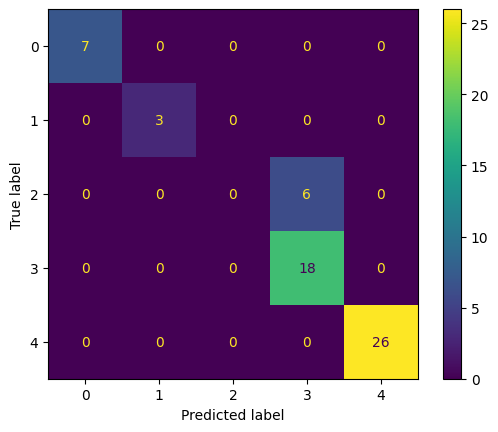

In [187]:
model = DecisionTreeClassifier(max_depth = 3)
model.fit(X,y)
model.score(X_test, y_test)
y_predict = model.predict(X_test)
print("Acuracy score: ", accuracy_score(y_test, y_predict))
plt.figure(figsize = (5, 5))
plt.title('Decision Tree Classification')
plot_tree(model, max_depth = 5, feature_names = X_train.columns, class_names = y_train, filled = True, rounded = True);
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict)).plot();

In [188]:
score = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
score.head()

,Actual,Predicted
95,drugX,drugX
15,drugY,drugY
30,drugX,drugX
158,drugC,drugX
128,drugY,drugY


# Medis (3) - Medžio gylis 2


Acuracy score:  0.85


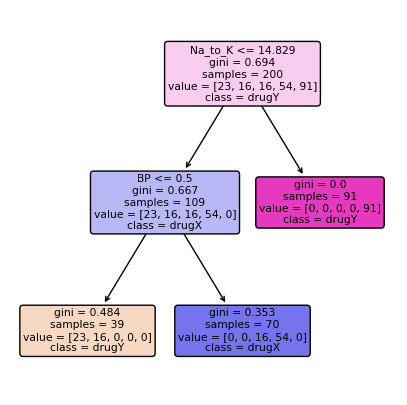

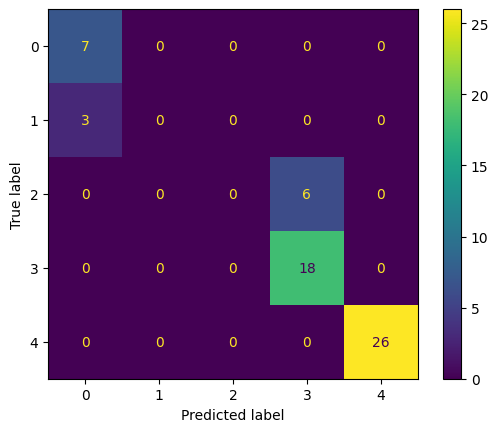

In [189]:
model = DecisionTreeClassifier(max_depth = 2)
model.fit(X,y)
model.score(X_test, y_test)
y_predict = model.predict(X_test)
print("Acuracy score: ", accuracy_score(y_test, y_predict))
plt.figure(figsize = (5, 5))
plt.title('Decision Tree Classification')
plot_tree(model, max_depth = 5, feature_names = X_train.columns, class_names = y_train, filled = True, rounded = True);
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict)).plot();

In [190]:
score = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
score.head()

,Actual,Predicted
95,drugX,drugX
15,drugY,drugY
30,drugX,drugX
158,drugC,drugX
128,drugY,drugY


# Medis (4) - Medžio gylis 1

Acuracy score:  0.7333333333333333


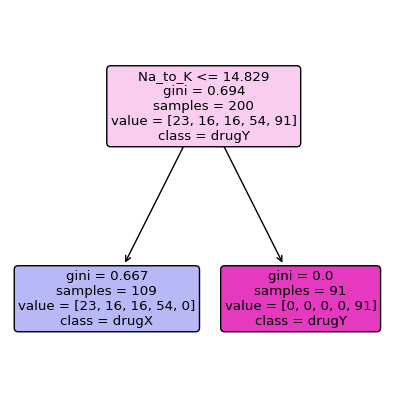

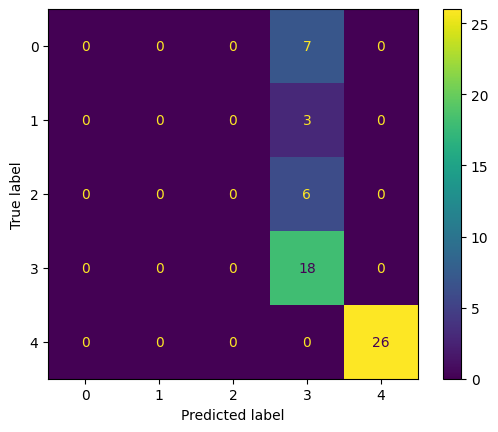

In [191]:
model = DecisionTreeClassifier(max_depth = 1)
model.fit(X,y)
model.score(X_test, y_test)
y_predict = model.predict(X_test)
print("Acuracy score: ", accuracy_score(y_test, y_predict))
plt.figure(figsize = (5, 5))
plt.title('Decision Tree Classification')
plot_tree(model, max_depth = 5, feature_names = X_train.columns, class_names = y_train, filled = True, rounded = True);
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict)).plot();

In [192]:
score = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
score.head()

,Actual,Predicted
95,drugX,drugX
15,drugY,drugY
30,drugX,drugX
158,drugC,drugX
128,drugY,drugY


# Algoritmas

**ID3 (Iterative Dichotomiser 3)**

    was developed in 1986 by Ross Quinlan. The algorithm creates a multiway tree, finding for each node (i.e. in a greedy manner) the categorical feature that will yield the largest information gain for categorical targets. Trees are grown to their maximum size and then a pruning step is usually applied to improve the ability of the tree to generalize to unseen data.

**C4.5** 

    is the successor to ID3 and removed the restriction that features must be categorical by dynamically defining a discrete attribute (based on numerical variables) that partitions the continuous attribute value into a discrete set of intervals. C4.5 converts the trained trees (i.e. the output of the ID3 algorithm) into sets of if-then rules. The accuracy of each rule is then evaluated to determine the order in which they should be applied. Pruning is done by removing a rule’s precondition if the accuracy of the rule improves without it.

**C5.0**

    is Quinlan’s latest version release under a proprietary license. It uses less memory and builds smaller rulesets than C4.5 while being more accurate.

**CART (Classification and Regression Trees)**

    is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yield the largest information gain at each node.

scikit-learn uses an optimized version of the CART algorithm; however, the scikit-learn implementation does not support categorical variables for now.

# Random Forest (1) - 5 medžiai
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Acuracy score:  0.9833333333333333


,Actual,Predicted
95,drugX,drugX
15,drugY,drugY
30,drugX,drugX
158,drugC,drugC
128,drugY,drugY


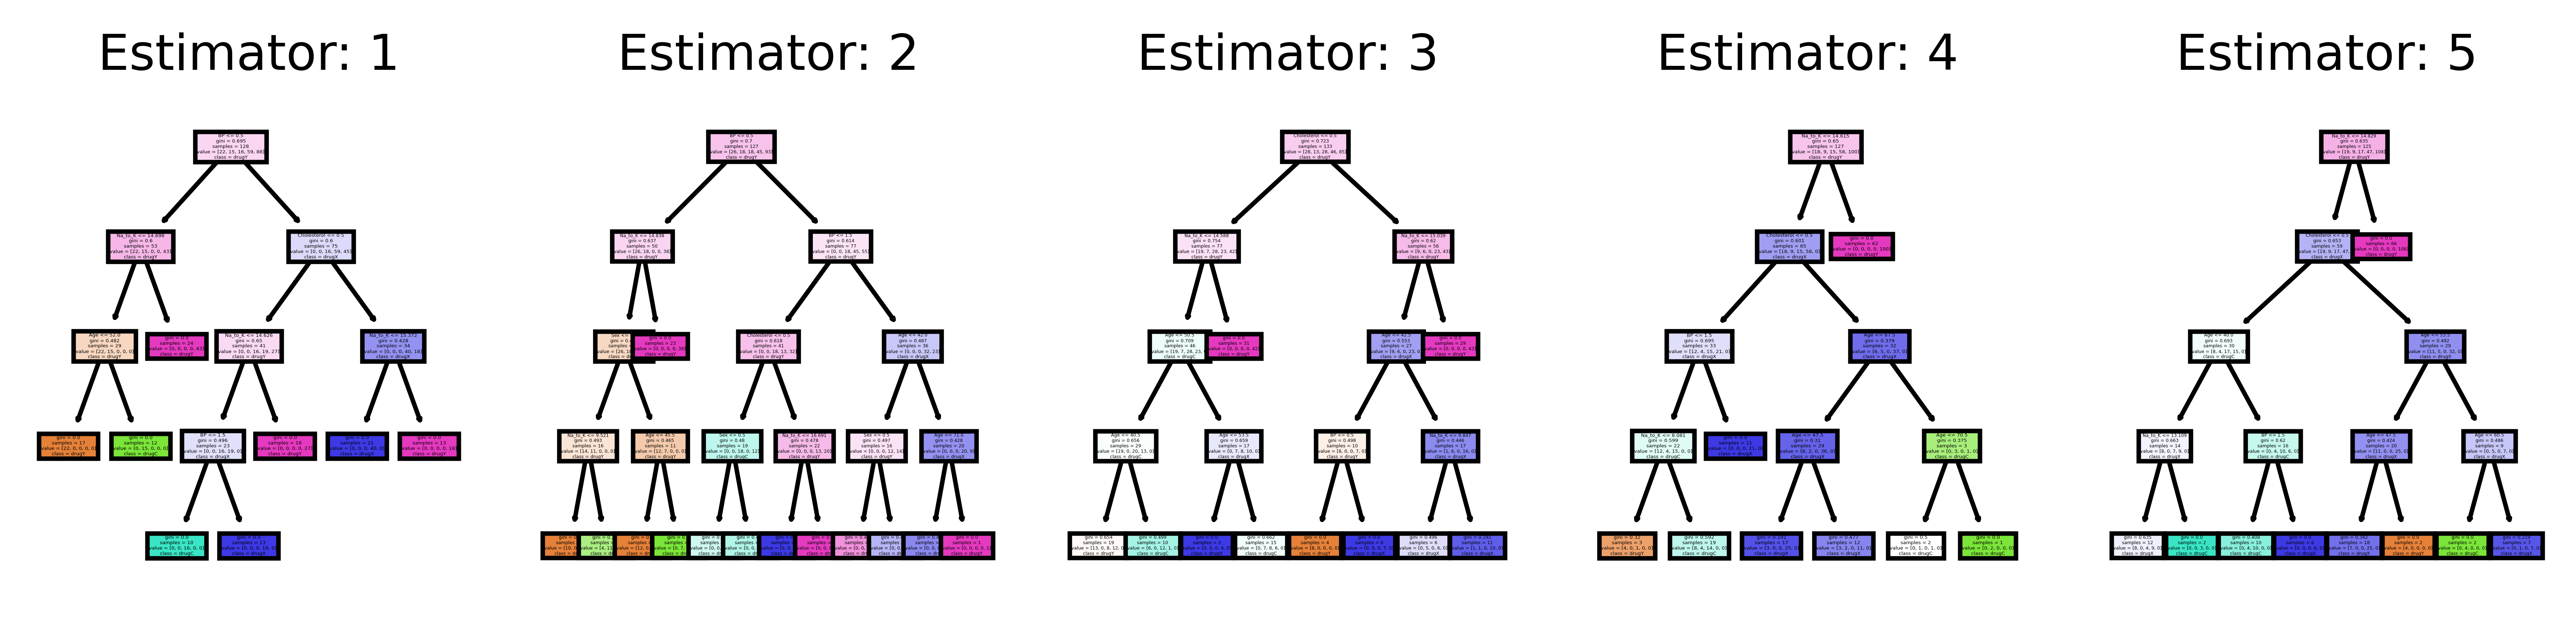

In [193]:
clf = RandomForestClassifier(n_estimators=5, max_depth=4, random_state=0);
clf.fit(X, y);
clf.score(X_test, y_test)
y_predict = clf.predict(X_test)
print("Acuracy score: ", accuracy_score(y_test, y_predict))
score = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(clf.estimators_[index],
                   feature_names = X_train.columns, 
                   class_names=y_train,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index + 1), fontsize = 11)
score.head()

# Random Forest (2) - 4 medžiai

Acuracy score:  1.0


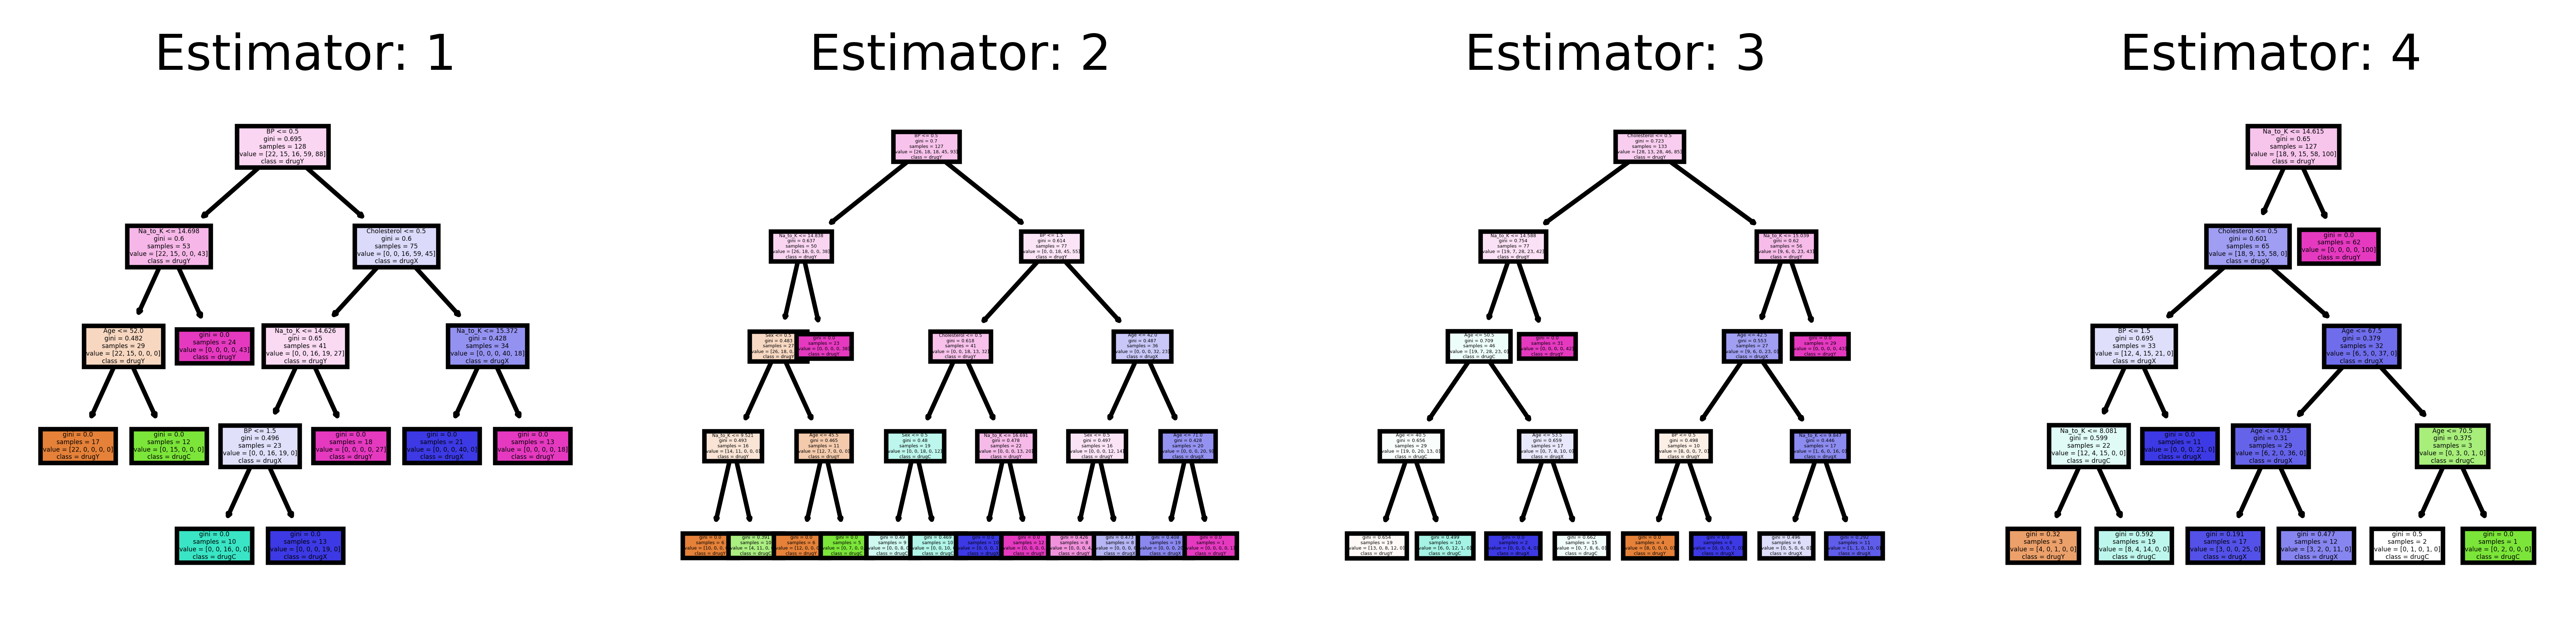

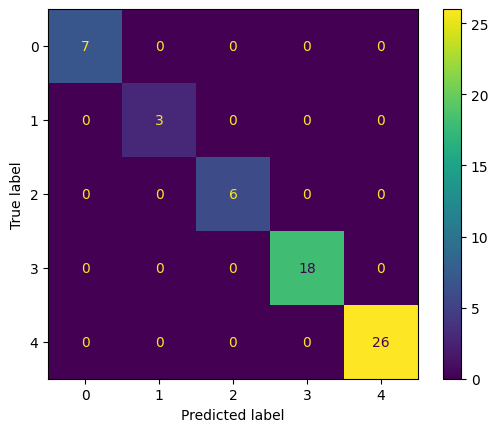

In [194]:
clf = RandomForestClassifier(n_estimators=4, max_depth=4, random_state=0);
clf.fit(X, y);
clf.score(X_test, y_test)
y_predict = clf.predict(X_test)
print("Acuracy score: ", accuracy_score(y_test, y_predict))
score = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
fig, axes = plt.subplots(nrows = 1,ncols = 4,figsize = (10,2), dpi=900)
for index in range(0, 4):
    tree.plot_tree(clf.estimators_[index],
                   feature_names = X_train.columns, 
                   class_names=y_train,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index + 1), fontsize = 11)
score.head()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict)).plot();

# Random Forest (2) - 3 medžiai

Acuracy score:  1.0


,Actual,Predicted
95,drugX,drugX
15,drugY,drugY
30,drugX,drugX
158,drugC,drugC
128,drugY,drugY


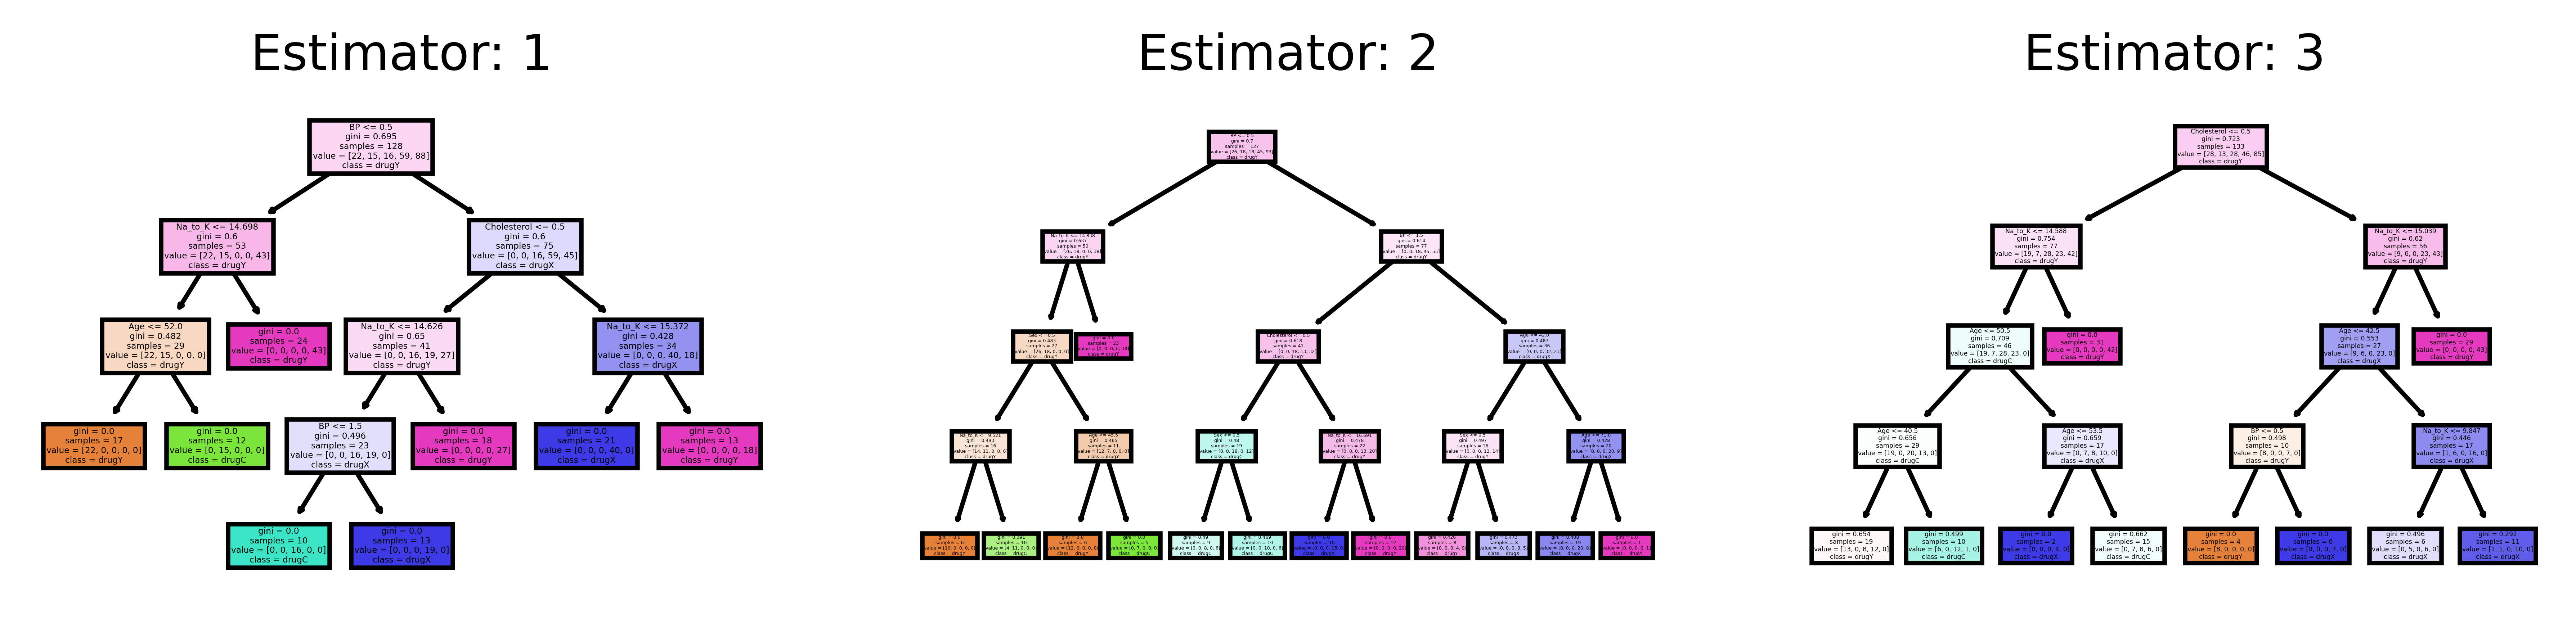

In [195]:
clf = RandomForestClassifier(n_estimators=3, max_depth=4, random_state=0);
clf.fit(X, y);
clf.score(X_test, y_test)
y_predict = clf.predict(X_test)
print("Acuracy score: ", accuracy_score(y_test, y_predict))
score = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=900)
for index in range(0, 3):
    tree.plot_tree(clf.estimators_[index],
                   feature_names = X_train.columns, 
                   class_names=y_train,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index + 1), fontsize = 11)
score.head()